In [23]:
import pickle
import numpy as np
from scipy.stats import entropy
import os
%matplotlib inline


In [24]:
def read_data(data_path):
    reviewer_representation = pickle.load( open( data_path+ 'dict_reviewer_lda_vectors.pickle', "rb" ))
    paper_representation = pickle.load( open( data_path + 'dict_paper_lda_vectors.pickle', "rb" ))
    

In [25]:
print(os.getcwd())
data_path = './fairness_research/rectified/'

/Users/amirraza/Downloads


In [26]:
reviewer_representation = pickle.load( open( data_path+ 'dict_reviewer_lda_vectors.pickle', "rb" ))
paper_representation = pickle.load( open( data_path + 'dict_paper_lda_vectors.pickle', "rb" ))

In [27]:
#check
#for key, value in paper_representation.items():
    #print(sum(value))


In [28]:
reviewer_fields = {}
for key, value in reviewer_representation.items():
    for index in range(len(value)):
        if index in reviewer_fields.keys():
            reviewer_fields[index].append(value[index])
        else:
            reviewer_fields[index] = [value[index]]

In [29]:
paper_fields = {}
for key, value in paper_representation.items():
    for index in range(len(value)):
        if index in paper_fields.keys():
            paper_fields[index].append(value[index])
        else:
            paper_fields[index] = [value[index]]

In [30]:
for key, value in reviewer_fields.items():
    mean = np.mean(value)
    std = np.std(value)
    #print('%d\t%.2f\t%.2f'%(key+1,mean,std))

In [31]:
for key, value in paper_fields.items():
    mean = np.mean(value)
    std = np.std(value)
    #print('%d\t%.2f\t%.2f'%(key+1,mean,std))

In [32]:
print(len(paper_representation.keys()))

600


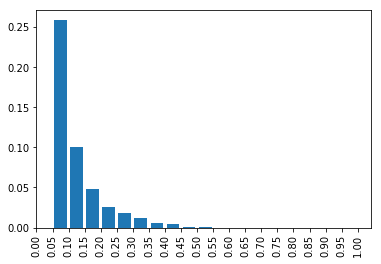

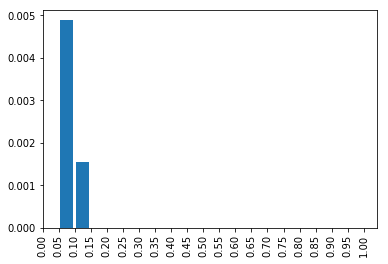

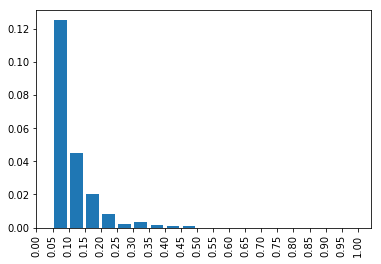

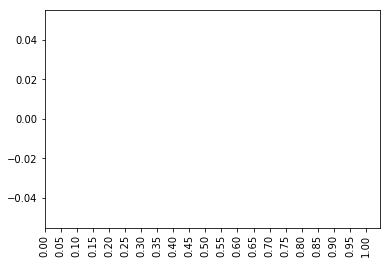

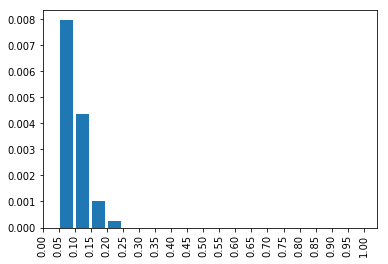

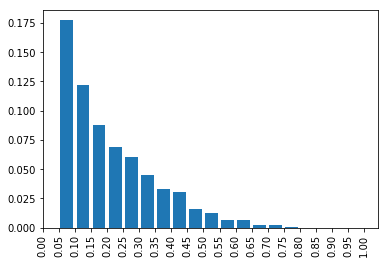

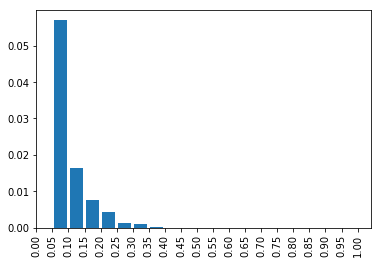

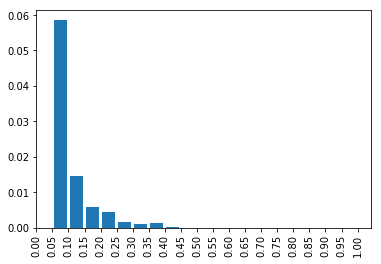

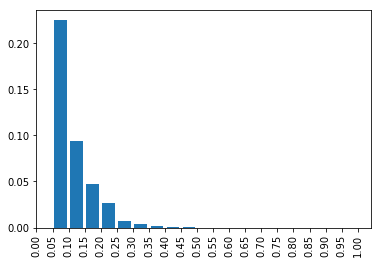

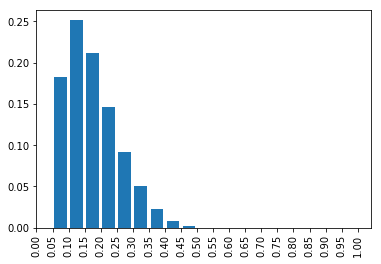

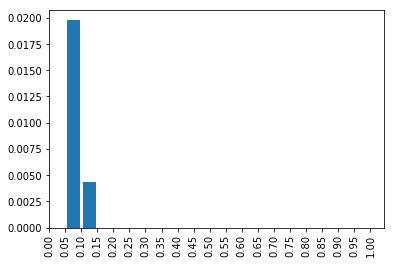

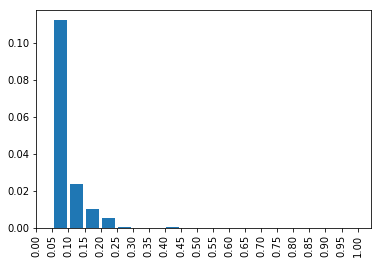

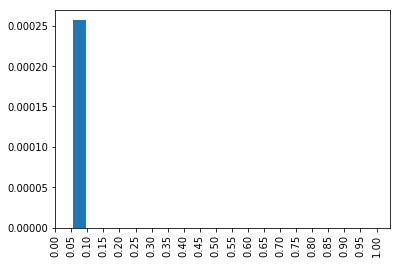

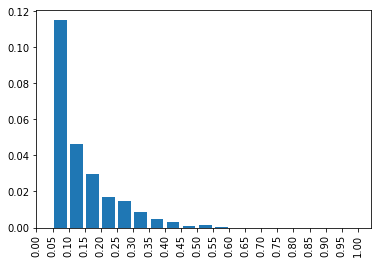

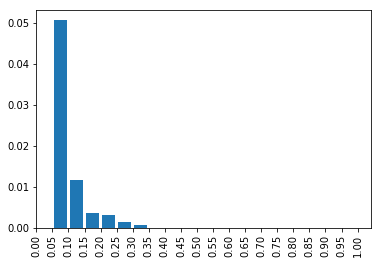

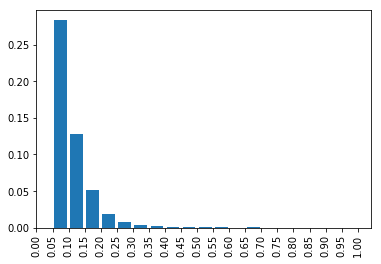

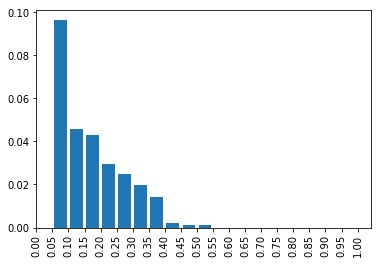

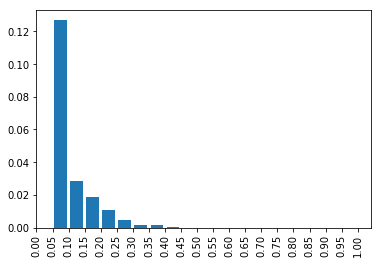

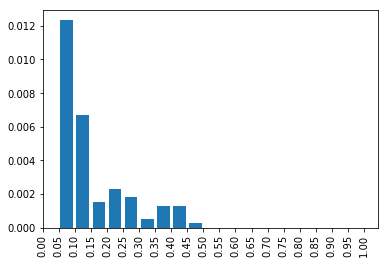

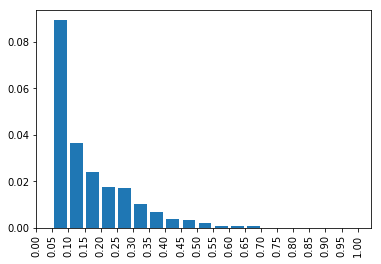

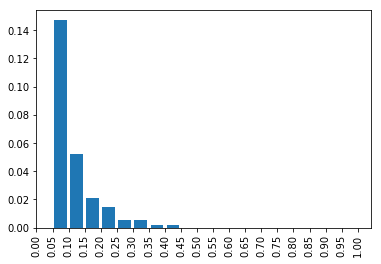

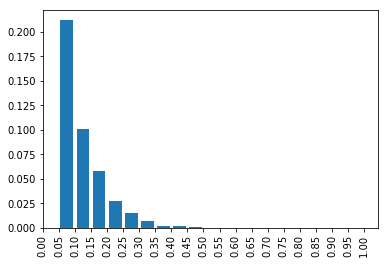

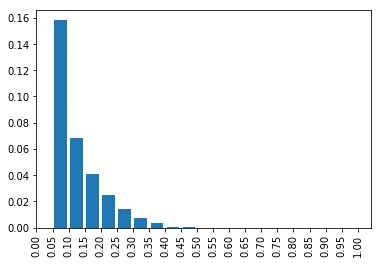

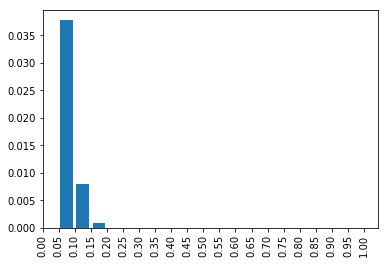

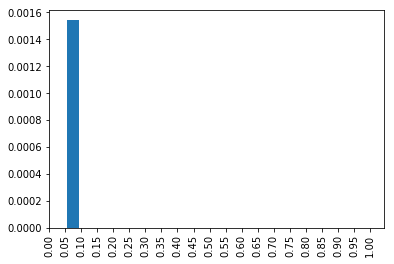

In [33]:
import matplotlib.pyplot as plt

for key,value in reviewer_fields.items():
    bins=np.arange(0.0,1.05,0.05)
    freq,_ = np.histogram(value,bins=bins)
    freq = [i/float(sum(freq)) for i in freq]
    labels = bins[:-1]+0.025
    labels = labels[1:]
    freq = freq[1:]
    plt.bar(labels,freq,width = 0.04)
    plt.xticks(bins,rotation='vertical')   
    plt.show()


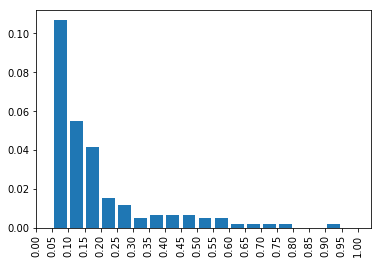

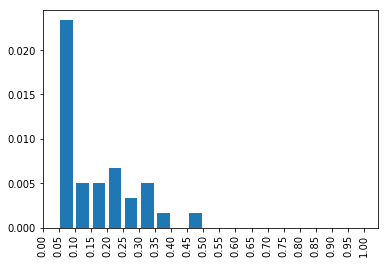

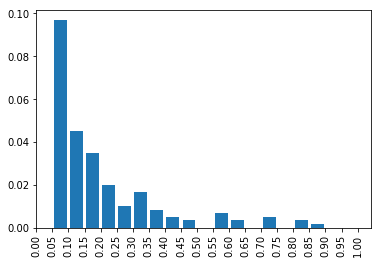

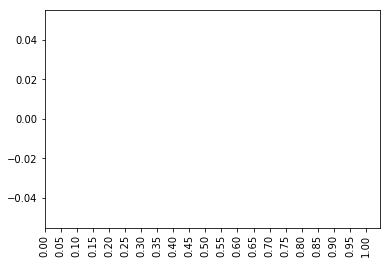

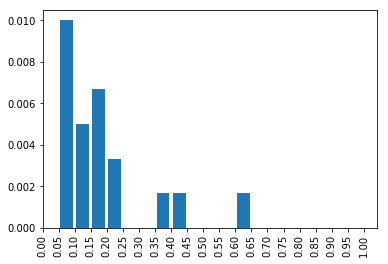

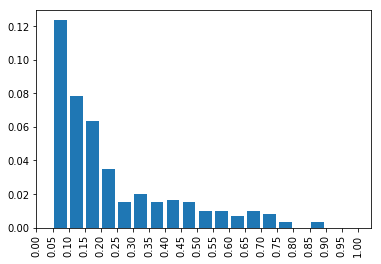

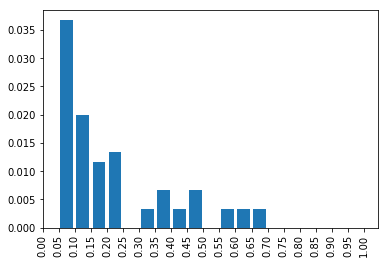

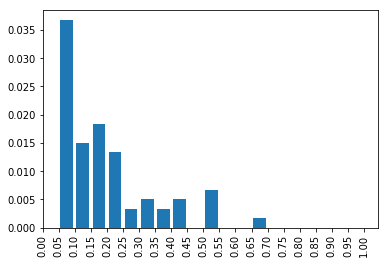

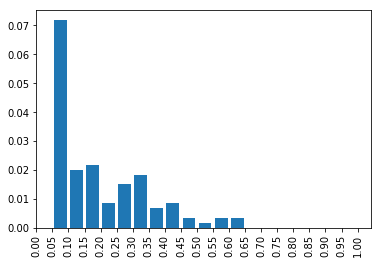

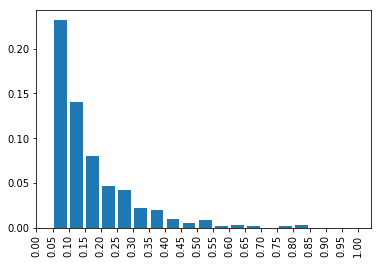

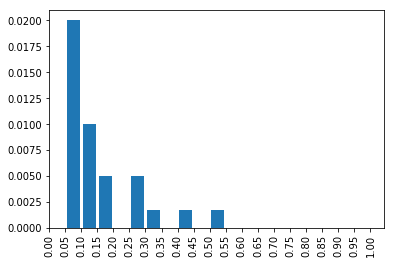

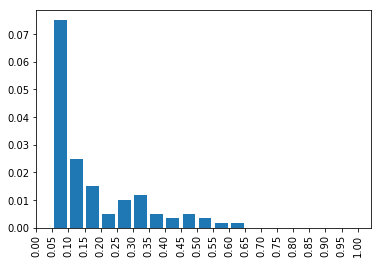

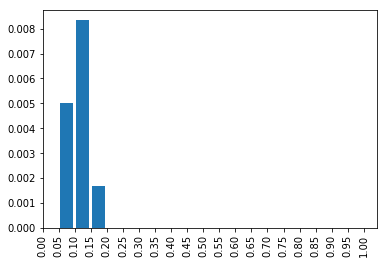

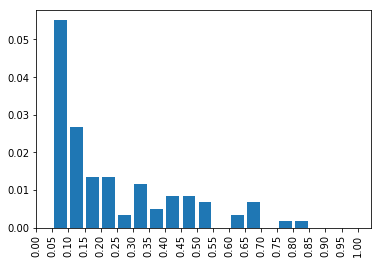

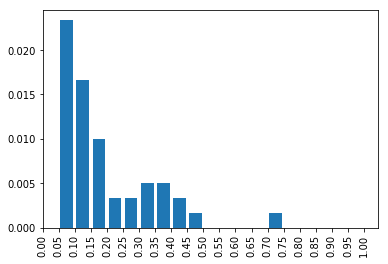

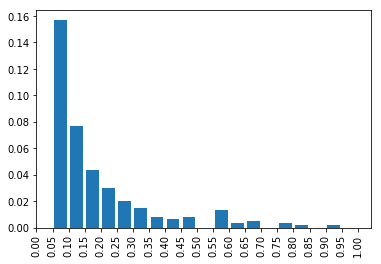

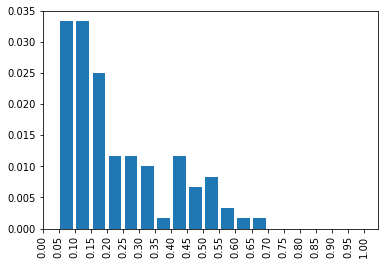

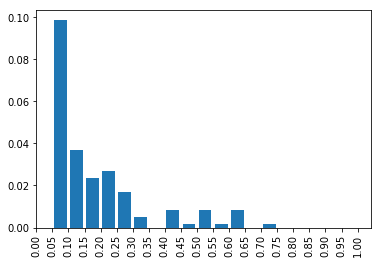

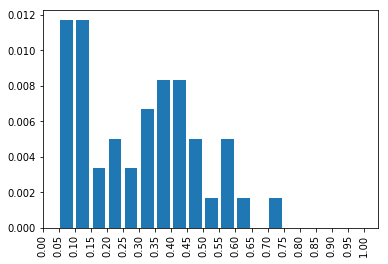

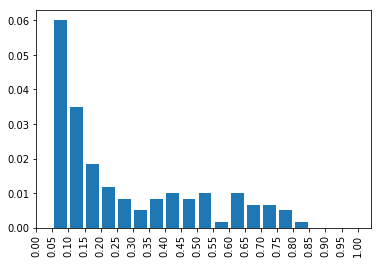

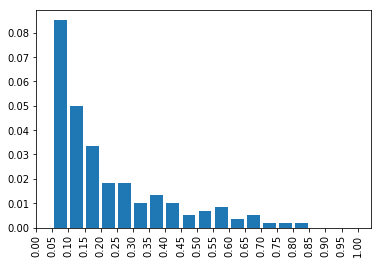

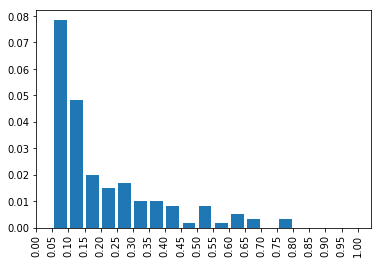

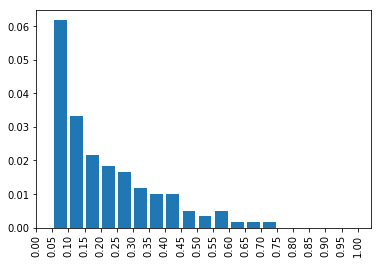

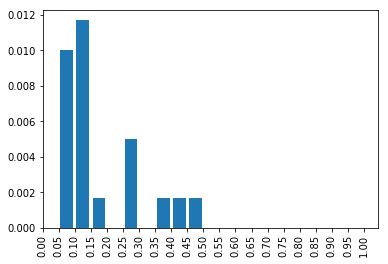

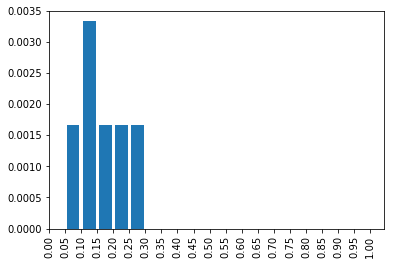

In [34]:
import matplotlib.pyplot as plt

for key,value in paper_fields.items():
    bins=np.arange(0.0,1.05,0.05)
    freq,_ = np.histogram(value,bins=bins)
    freq = [i/float(sum(freq)) for i in freq]
    labels = bins[:-1]+0.025
    labels = labels[1:]
    freq = freq[1:]
    plt.bar(labels,freq,width = 0.04)
    plt.xticks(bins,rotation='vertical')   
    plt.show()


[0.  0.5 1.  1.5 2.  2.5 3. ]
[   0    4  113 1138 2574   71]


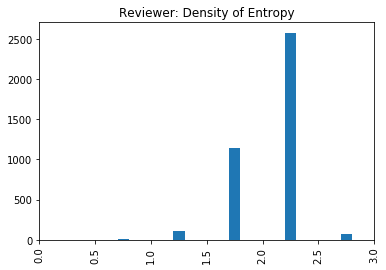

In [35]:
entropy_values = []
max_values = []
for key, value in reviewer_representation.items():
    entropy_values.append(entropy(value))
    max_values.append(max(value)) 

bins=np.arange(0.0,3.5,0.5)
freq, bins = np.histogram(entropy_values,bins=bins)
print(bins)
print(freq)
labels = bins[:-1]+0.25
plt.bar(labels,freq,width = 0.1)
plt.xticks(bins,rotation='vertical')   
plt.title("Reviewer: Density of Entropy")
plt.show()

In [36]:
bins=np.arange(0.0,1.1,0.1)
freq, bins = np.histogram(max_values,bins=bins)
print(freq)
print(bins)

[   0  465 1881 1081  330   98   37    8    0    0]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


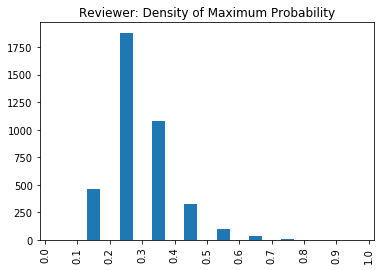

In [37]:
labels = bins[:-1]+0.05
plt.bar(labels,freq,width = 0.04)
plt.xticks(bins,rotation='vertical')  
plt.title("Reviewer: Density of Maximum Probability")
plt.show()

[0.  0.5 1.  1.5 2.  2.5 3. ]
[  6  43 215 291  40   5]


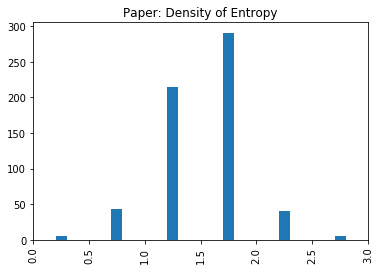

In [38]:
entropy_values = []
max_values= []
for key, value in paper_representation.items():
    entropy_values.append(entropy(value))
    max_values.append(max(value)) 
    
bins=np.arange(0.0,3.5,0.5)
freq, bins = np.histogram(entropy_values,bins=bins)
print(bins)
print(freq)
labels = bins[:-1]+0.25
plt.bar(labels,freq,width = 0.1)
plt.xticks(bins,rotation='vertical')  
plt.title("Paper: Density of Entropy")
plt.show()

[  0  13  79 156 144  97  67  31  11   2]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


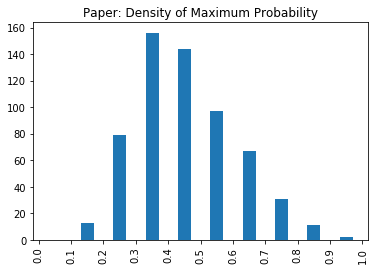

In [39]:
bins=np.arange(0.0,1.1,0.1)
freq, bins = np.histogram(max_values,bins=bins)
print(freq)
print(bins)
labels = bins[:-1]+0.05
plt.bar(labels,freq,width = 0.04)
plt.xticks(bins,rotation='vertical')  
plt.title("Paper: Density of Maximum Probability")
plt.show()